This notebook shows how to use an index file.<br/>
This example uses the index file from the Mediterranean Sea region ([INSITU_MED_NRT_OBSERVATIONS_013_035](http://marine.copernicus.eu/web/69-interactive-catalogue.php?option=com_csw&view=details&product_id=INSITU_MED_NRT_OBSERVATIONS_013_035)) corresponding to the latest data.<br/>
If you download the same file, the results will be slightly different from what is shown here.

In [1]:
indexfile = "datafiles/index_latest.txt"

To read the index file (comma separated values), we will try with the [genfromtxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) function.

In [2]:
import numpy as np
dataindex = np.genfromtxt(indexfile, skip_header=6, unpack=True, delimiter=',', dtype=None, \
              names=['catalog_id', 'file_name', 'geospatial_lat_min', 'geospatial_lat_max',
                     'geospatial_lon_min', 'geospatial_lon_max',
                     'time_coverage_start', 'time_coverage_end', 
                     'provider', 'date_update', 'data_mode', 'parameters'])

# Map of observations

In [3]:
lon_min = dataindex['geospatial_lon_min']
lon_max = dataindex['geospatial_lon_max']
lat_min = dataindex['geospatial_lat_min']
lat_max = dataindex['geospatial_lat_max']

We import the modules necessary for the plot.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

We create the projection, centered on the Mediterranean Sea in this case.

In [7]:
m = Basemap(projection='merc', llcrnrlat=30., urcrnrlat=46.,
            llcrnrlon=-10, urcrnrlon=40., lat_ts=38., resolution='l')
lonmean, latmean = 0.5*(lon_min + lon_max), 0.5*(lat_min + lat_max)
lon2plot, lat2plot = m(lonmean, latmean)

And we create a plot showing all the data locations.

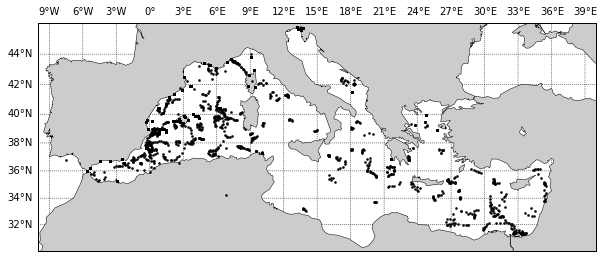

In [8]:
fig = plt.figure(figsize=(10,8))
m.plot(lon2plot, lat2plot, 'ko', markersize=2)
m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)

m.drawparallels(np.arange(-90.,91.,2.), labels=[1,0,0,0], linewidth=0.5, zorder=1)
m.drawmeridians(np.arange(-180.,181.,3.), labels=[0,0,1,0], linewidth=0.5, zorder=1)
plt.show()

# Selection of a data file based on coordinates

Let's assume we want to have the list of files corresponding to measurements off the northern of Lybia.<br/>
We define a rectangular box containg the data:

In [71]:
box = [12, 15, 32, 34]

then we look for the observations within this box:

In [76]:
import numpy as np
goodcoordinates = np.where( (lonmean>=box[0]) & (lonmean<=box[1]) & (latmean>=box[2]) & (latmean<=box[3]))
print goodcoordinates

(array([ 278,  632,  978, 1341, 1720, 2062, 2408]),)


The generation of the file list is direct:

In [78]:
goodfilelist = dataindex['file_name'][goodcoordinates]
print goodfilelist

[ 'ftp://medinsitu.hcmr.gr/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/latest/20151120/GL_LATEST_PR_PF_1900948_20151120.nc'
 'ftp://medinsitu.hcmr.gr/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/latest/20151124/GL_LATEST_PR_PF_1900948_20151124.nc'
 'ftp://medinsitu.hcmr.gr/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/latest/20151128/GL_LATEST_PR_PF_1900948_20151128.nc'
 'ftp://medinsitu.hcmr.gr/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/latest/20151202/GL_LATEST_PR_PF_1900948_20151202.nc'
 'ftp://medinsitu.hcmr.gr/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/latest/20151206/GL_LATEST_PR_PF_1900948_20151206.nc'
 'ftp://medinsitu.hcmr.gr/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/latest/20151210/GL_LATEST_PR_PF_1900948_20151210.nc'
 'ftp://medinsitu.hcmr.gr/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/latest/20151214/GL_LATEST_PR_PF_1900948_20151214.nc']


According to the file names, we have 7 profiling drifters available in the area. <br/>
To check, we replot the data only in the selected box:

In [81]:
m2 = Basemap(projection='merc', llcrnrlat=32., urcrnrlat=34.,
            llcrnrlon=12, urcrnrlon=15., lat_ts=38., resolution='h')
lon2plot, lat2plot = m2(lonmean[goodcoordinates], latmean[goodcoordinates])

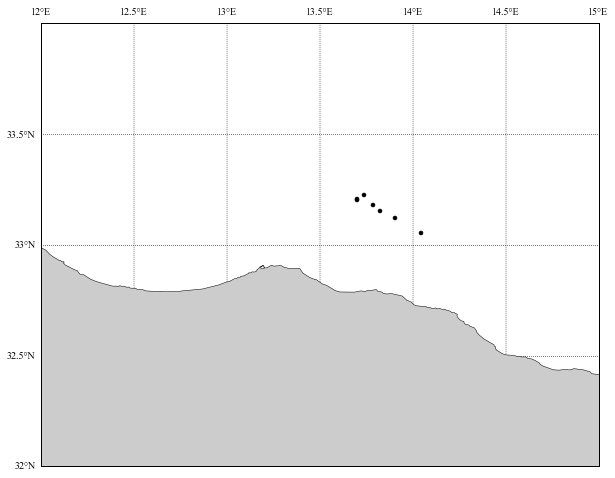

In [82]:
fig = plt.figure(figsize=(10,8))
m2.plot(lon2plot, lat2plot, 'ko', markersize=4)
m2.drawcoastlines(linewidth=0.5, zorder=3)
m2.fillcontinents(zorder=2)

m2.drawparallels(np.arange(-90.,91.,0.5), labels=[1,0,0,0], linewidth=0.5, zorder=1)
m2.drawmeridians(np.arange(-180.,181.,0.5), labels=[0,0,1,0], linewidth=0.5, zorder=1)
plt.show()